References:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7713764/pdf/kosfa-40-6-924.pdf
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8257669/

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/atypical-metaboanalysis/Atypical metaboanalysis.csv


In [2]:
df = pd.read_csv('/kaggle/input/atypical-metaboanalysis/Atypical metaboanalysis.csv')

In [3]:
df.head(15)

,Sample,Pheno,xylulose,xylose,xylonolactone,xylitol,xanthosine,xanthine,vanillic acid,valine,...,2-hydroxyhexanoic acid,2-hydroxyglutaric acid,2'-deoxyguanosine,"2,5-dihydroxypyrazine","2,3-bisphosphoglyceric acid",1-monostearin,1-monopalmitin,1-methylinosine,1-hexadecanol,"1,5-anhydroglucitol"
0,ADC1,ADC,92500,27707,3442,80199,3730,109781,3584,812559,...,2118,7701,483,2210,614,13059,6396,808,1209,7860
1,ADC2,ADC,166598,116774,4055,146015,8554,193038,4547,1105979,...,2539,5343,965,2864,653,11002,6975,361,1034,7323
2,ADC3,ADC,64796,18944,4935,73995,3859,55886,4140,404292,...,2186,11891,426,1731,437,22418,9956,624,3645,6696
3,ADC4,ADC,116172,31956,5010,135438,4058,70377,4614,788424,...,2506,8174,499,4513,1564,7496,4529,777,1368,8538
4,ADC5,ADC,62234,31298,2740,184072,4985,65532,3758,893213,...,2104,8843,530,3353,765,10799,5169,555,1252,8931
5,ADC6,ADC,80077,23941,6902,159938,3550,32257,3923,477031,...,1622,10612,730,5451,689,14006,5357,664,1887,8436
6,N1,N,121505,20789,4498,60656,4177,68888,3746,904638,...,2513,18982,586,3716,8219,7298,3271,627,3301,9158
7,N2,N,82485,17484,4438,91479,4643,56313,2843,722239,...,1966,9617,728,6368,5729,5683,2886,428,2468,2506
8,N3,N,117639,29373,6661,125530,4868,74383,3886,379112,...,3180,25401,516,2221,764,4973,2735,749,1642,9926
9,N4,N,184097,29344,6108,122103,5357,89955,5672,942125,...,2875,9849,590,3673,1343,11959,4398,804,2096,7238


In [4]:
unique_samples = df['Sample'].nunique()
unique_samples_names = df['Sample'].unique()
unique_pheno = df['Pheno'].nunique()
unique_pheno_names = df['Pheno'].unique()
print(f'The number of unique samples is: {unique_samples}')
print(f'The number of unique pheno is: {unique_pheno}')
print(unique_samples_names)
print(unique_pheno_names)

The number of unique samples is: 12
The number of unique pheno is: 2
['ADC1' 'ADC2' 'ADC3' 'ADC4' 'ADC5' 'ADC6' 'N1' 'N2' 'N3' 'N4' 'N5' 'N6']
['ADC' 'N']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Columns: 172 entries, Sample to 1,5-anhydroglucitol
dtypes: int64(170), object(2)
memory usage: 16.2+ KB


In [6]:
df.describe()

,xylulose,xylose,xylonolactone,xylitol,xanthosine,xanthine,vanillic acid,valine,uridine,uric acid,...,2-hydroxyhexanoic acid,2-hydroxyglutaric acid,2'-deoxyguanosine,"2,5-dihydroxypyrazine","2,3-bisphosphoglyceric acid",1-monostearin,1-monopalmitin,1-methylinosine,1-hexadecanol,"1,5-anhydroglucitol"
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,1.200000e+01,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,110389.916667,32266.416667,4946.083333,114676.666667,4846.083333,79671.666667,4104.916667,7.391550e+05,8827.000000,1229.833333,...,2323.083333,11706.083333,594.166667,3794.750000,2159.583333,10015.750000,4816.333333,663.500000,1991.166667,7302.666667
std,38795.654277,27215.595694,1246.317226,40777.103193,1327.266258,42116.092352,699.513787,2.254595e+05,2688.532212,984.477511,...,431.101435,5631.767516,161.071319,1869.429671,2556.880822,5034.955035,2150.031304,154.204999,859.548595,2102.865592
min,62234.000000,14357.000000,2740.000000,59574.000000,3550.000000,32257.000000,2843.000000,3.791120e+05,2272.000000,183.000000,...,1622.000000,5343.000000,388.000000,1731.000000,437.000000,4973.000000,2735.000000,361.000000,1034.000000,2506.000000
25%,81883.000000,20327.750000,4342.250000,78648.000000,4008.250000,56206.250000,3755.000000,5.989360e+05,8026.750000,442.500000,...,2069.500000,8582.000000,495.000000,2218.250000,650.500000,5924.500000,3077.000000,606.750000,1323.250000,6692.000000
50%,104909.500000,26468.500000,4897.000000,123816.500000,4755.500000,69632.500000,3932.000000,7.945505e+05,8942.500000,921.500000,...,2266.000000,9733.000000,558.000000,3513.000000,764.500000,9147.500000,4463.500000,686.500000,1764.500000,7591.500000
75%,126861.000000,29854.250000,5805.750000,139344.500000,5078.000000,92131.750000,4561.500000,8.960692e+05,10615.500000,1862.500000,...,2519.500000,12753.750000,698.750000,4747.500000,2296.750000,12234.000000,5616.750000,783.750000,2512.250000,8636.250000
max,184097.000000,116774.000000,6902.000000,184072.000000,8554.000000,193038.000000,5672.000000,1.105979e+06,11740.000000,3321.000000,...,3180.000000,25401.000000,965.000000,7593.000000,8219.000000,22418.000000,9956.000000,856.000000,3645.000000,9926.000000


In [7]:
df.isna().sum()

Sample                 0
Pheno                  0
xylulose               0
xylose                 0
xylonolactone          0
                      ..
1-monostearin          0
1-monopalmitin         0
1-methylinosine        0
1-hexadecanol          0
1,5-anhydroglucitol    0
Length: 172, dtype: int64

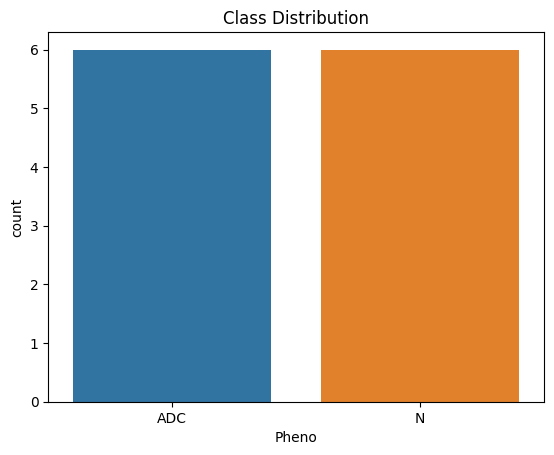

In [8]:
# Visualize the distribution of classes (Pheno)
sns.countplot(x='Pheno', data=df)
plt.title('Class Distribution')
plt.show()

Both classes are equal size, as shown above.


In [9]:

from scipy.stats import pointbiserialr

Point-biserial correlation is a measure of association between a binary variable (a variable with two categories) and a continuous variable.

In [10]:
# Encode Pheno as binary (assuming 'ADC' is one class and others are another)
df['Pheno_binary'] = (df['Pheno'] == 'ADC').astype(int)


In [11]:
# Calculate point-biserial correlation for each numerical variable
correlations = {}
for column in df.columns:
    if column not in ['Sample', 'Pheno', 'Pheno_binary']:
        correlation, _ = pointbiserialr(df['Pheno_binary'], df[column])
        correlations[column] = correlation

# Display correlations
for metabolite, correlation in correlations.items():
    print(f"{metabolite}: {correlation}")

xylulose : -0.3587949429807812
xylose: 0.36472356404008577
xylonolactone : -0.36210389579031066
xylitol: 0.3910280477066759
xanthosine: -0.04465829029740147
xanthine: 0.20187359082487086
vanillic acid: -0.015802306348037407
valine: 0.03595522547445558
uridine: -0.6644461604348434
uric acid: -0.31085374297090557
urea: -0.8766150592910125
uracil: 0.4166484435116449
UDP GlcNAc: -0.2633071415005266
tyrosine: -0.35432319638735543
tryptophan: -0.3419271112326846
trans-4-hydroxyproline: -0.1119016650848417
tocopherol alpha-: 0.6419393004363116
threonine: 0.06516218534224663
threonic acid: 0.17126224664663597
sucrose: 0.14731802477697079
succinic acid: -0.6318690150746891
succinate semialdehyde: 0.30281206548755685
squalene: 0.36084819836838433
sorbitol: -0.2625235043310879
sophorose: -0.6970184218342169
shikimic acid: -0.36259646632216647
serine: 0.07817478514178436
salicylic acid: 0.23600834872254706
ribulose-5-phosphate: -0.5220796659238267
ribose-5-phosphate: 0.14573224594888212
ribose: -0

# ANOVA

In [12]:
from scipy.stats import f_oneway

In [13]:
# Select numerical variables
numerical_variables = df.columns.difference(['Sample', 'Pheno', 'Pheno_binary'])

**hypothesis: no significant difference between the features**

In [14]:
anova_results = {}
for variable in numerical_variables:
    adc_values = df[df['Pheno'] == 'ADC'][variable]
    non_adc_values = df[df['Pheno'] != 'ADC'][variable]
    
    # Perform ANOVA
    f_statistic, p_value = f_oneway(adc_values, non_adc_values)
    
    # Store results
    anova_results[variable] = {'F-statistic': f_statistic, 'p-value': p_value}

# Display ANOVA results
for variable, result in anova_results.items():
    print(f"{variable}: F-statistic = {result['F-statistic']}, p-value = {result['p-value']}")


1,5-anhydroglucitol: F-statistic = 1.2094585614472153, p-value = 0.29720903421040906
1-hexadecanol: F-statistic = 1.0962366971667878, p-value = 0.3197405386193358
1-methylinosine : F-statistic = 0.49293373394896567, p-value = 0.4986368915717899
1-monopalmitin: F-statistic = 14.368254047567484, p-value = 0.003540204642403567
1-monostearin: F-statistic = 7.163072627574838, p-value = 0.023236200401575677
2'-deoxyguanosine: F-statistic = 0.054302447250645015, p-value = 0.8204394945107246
2,3-bisphosphoglyceric acid: F-statistic = 4.585186707142925, p-value = 0.05790743653376734
2,5-dihydroxypyrazine : F-statistic = 0.6465791263294335, p-value = 0.44003514624149204
2-hydroxyglutaric acid: F-statistic = 4.253048939925151, p-value = 0.0661327144466728
2-hydroxyhexanoic acid: F-statistic = 1.3840384722294274, p-value = 0.26665974140808746
2-hydroxyvaleric acid: F-statistic = 2.226565881719903, p-value = 0.16651413006638893
2-ketoadipic acid: F-statistic = 6.713567829276618, p-value = 0.0269012

In [15]:
#Extract variable names and p-values
variables = list(anova_results.keys())
p_values = [result['p-value'] for result in anova_results.values()]

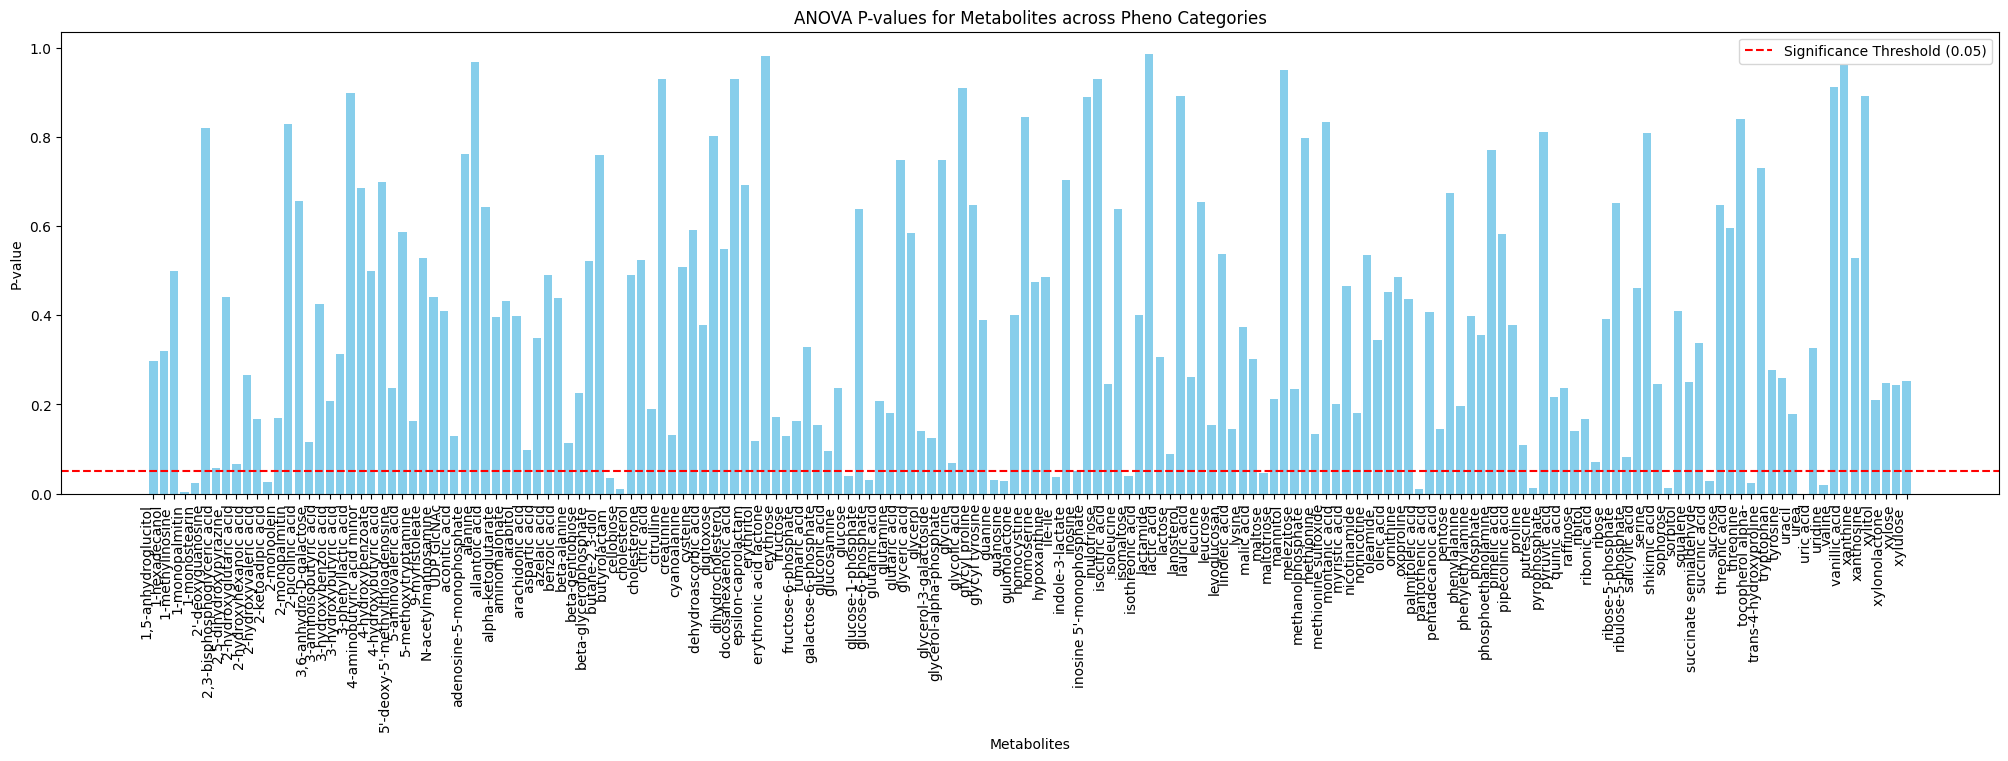

In [16]:
# Plotting
fig, ax = plt.subplots(figsize=(25, 6))
bars = ax.bar(variables, p_values, color='skyblue')
# Adding a threshold line (p-value of 0.05)
threshold = 0.05
ax.axhline(y=threshold, color='red', linestyle='--', label=f'Significance Threshold ({threshold})')

# Adding labels and title
ax.set_xlabel('Metabolites')
ax.set_ylabel('P-value')
ax.set_title('ANOVA P-values for Metabolites across Pheno Categories')
ax.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Display the plot
plt.show()

Finding variables with p-value less than 0.05 

In [17]:
# Extract variable names and p-values
significant_variables = [variable for variable, result in anova_results.items() if result['p-value'] < threshold]

# Print the significant variables
print(f"Variables with p-values less than {threshold}:")
for variable in significant_variables:
    print(variable)

Variables with p-values less than 0.05:
1-monopalmitin
1-monostearin
2-ketoadipic acid
butyrolactam 
cellobiose
glucose
glucose-6-phosphate
guanine
guanosine
ile-ile 
isomaltose
maltose
palmitoleic acid
putrescine
sophorose
succinic acid
tocopherol alpha-
urea
uridine


In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler #scale data for single unit variance

In [19]:
# Extracting the features (metabolite levels)
X = df.drop(['Sample', 'Pheno'], axis=1)

In [20]:
# Standardize the data
X_standardized = StandardScaler().fit_transform(X) #scaled data

In [21]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_standardized)

In [22]:
X_standardized.shape

(12, 171)

In [23]:
principal_components.shape

(12, 2)

In [24]:
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, principal_components.shape[1] + 1)])
# Add back the 'Sample' and 'Pheno' columns
pc_df[['Sample', 'Pheno']] = df[['Sample', 'Pheno']]

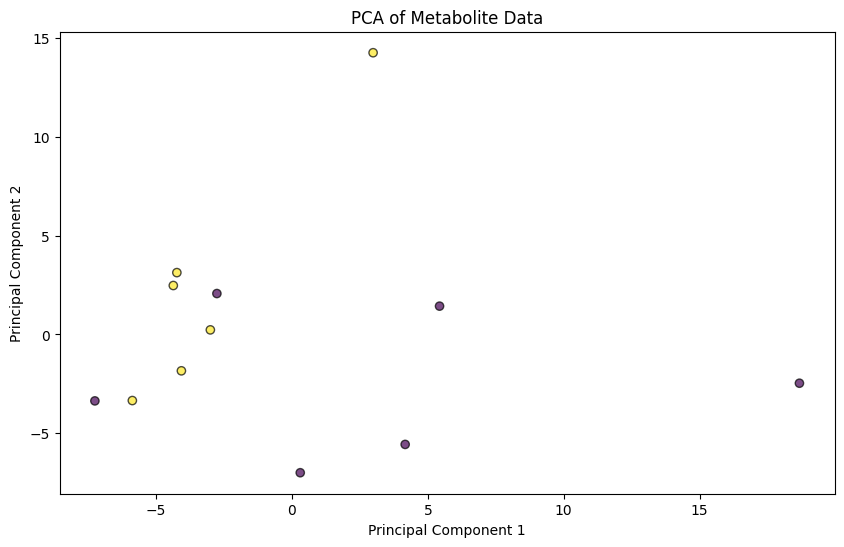

In [25]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(pc_df['PC1'], pc_df['PC2'], c=df['Pheno'].astype('category').cat.codes, cmap='viridis', edgecolors='k', alpha=0.7)
plt.title('PCA of Metabolite Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [27]:
linkage_method = 'ward'

In [28]:
Z = linkage(X_standardized, method=linkage_method)


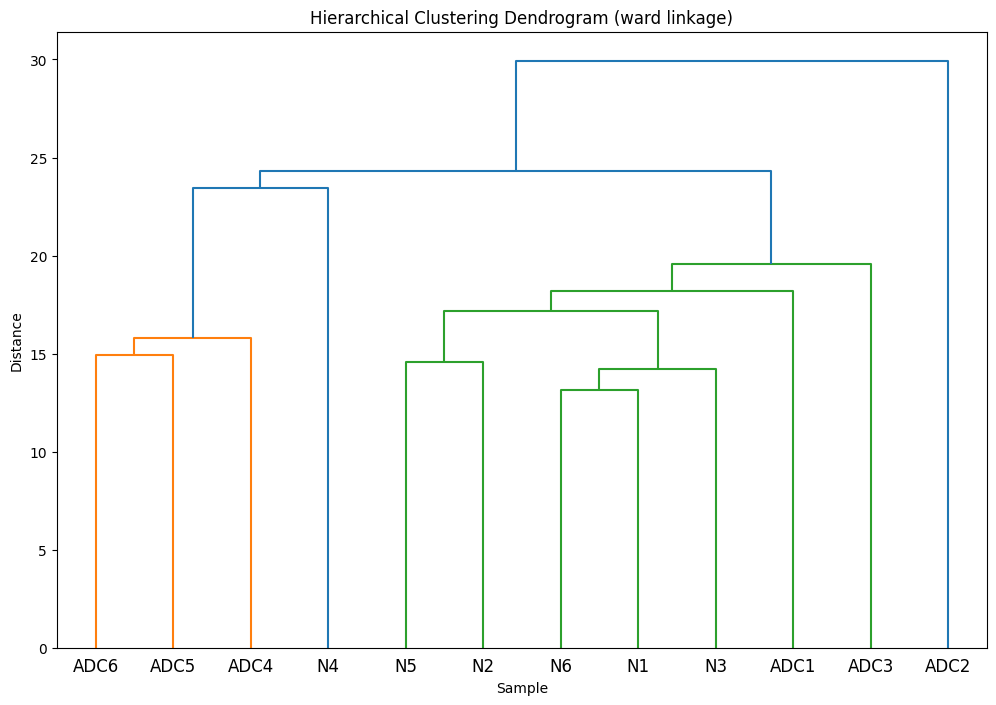

In [29]:
# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=df['Sample'].tolist(), orientation='top', distance_sort='descending')
plt.title(f'Hierarchical Clustering Dendrogram ({linkage_method} linkage)')
plt.xlabel('Sample')
plt.ylabel('Distance')
plt.show()

# Partial Least Squares (PLS) regression 
This is a statistical method used for modeling the relationship between a set of independent variables (X) and a dependent variable (Y). PLS regression is particularly useful when dealing with high-dimensional data or when there is multicollinearity among the independent variables. The goal of PLS regression is to model the relationship between the matrix of metabolite concentrations (X) and the binary response variable (Y). PLS regression will identify latent variables (also known as components) that capture the maximum covariance between X and Y.

In [30]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [31]:
df['Pheno_binary'] = (df['Pheno'] == 'ADC').astype(int)

In [32]:
X = df.drop(['Sample', 'Pheno'], axis =1)

In [33]:
y = df['Pheno_binary']

In [34]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize PLS-DA model
plsda = PLSRegression(n_components=2)  

In [35]:
# Initialize PLS-DA model
plsda = PLSRegression(n_components=2) 

In [36]:
# Fit the model
plsda.fit(X_train, y_train)

PLSRegression()

In [37]:
# Predictions
y_pred = plsda.predict(X_test)

In [38]:
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

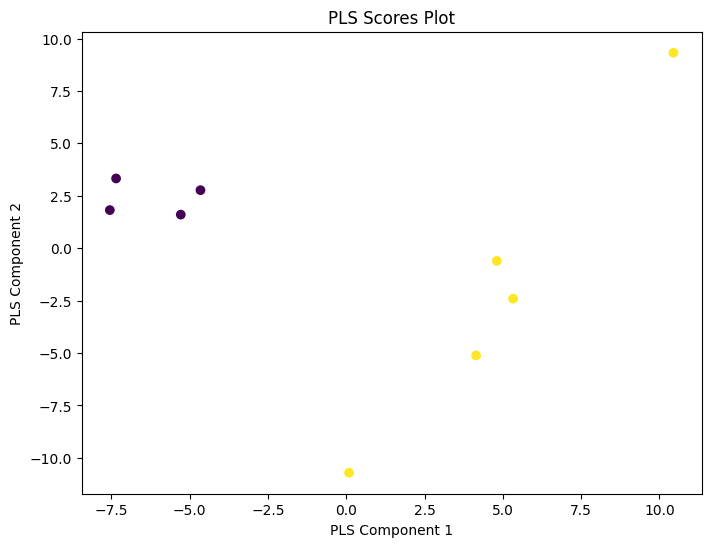

In [39]:
# Scores plot
scores = plsda.x_scores_
plt.figure(figsize=(8, 6))
plt.scatter(scores[:, 0], scores[:, 1], c=y_train, cmap='viridis')
plt.xlabel('PLS Component 1')
plt.ylabel('PLS Component 2')
plt.title('PLS Scores Plot')
plt.show()

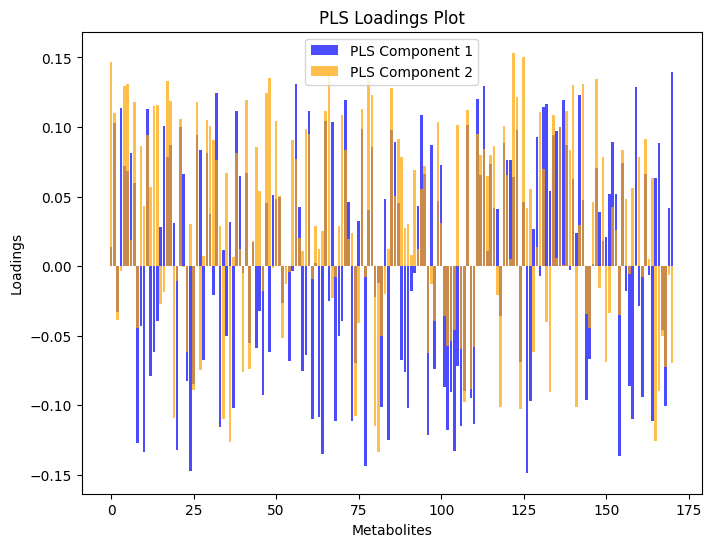

In [40]:
#loadings plot
loadings = plsda.x_loadings_
plt.figure(figsize=(8, 6))
plt.bar(range(X_train.shape[1]), loadings[:, 0], color='blue', alpha=0.7, label='PLS Component 1')
plt.bar(range(X_train.shape[1]), loadings[:, 1], color='orange', alpha=0.7, label='PLS Component 2')
plt.xlabel('Metabolites')
plt.ylabel('Loadings')
plt.title('PLS Loadings Plot')
plt.legend()
plt.show()

In [41]:
# Get the rotations (weights)
rotations = plsda.x_rotations_

In [42]:
# Calculate VIP
squared_weights = np.square(rotations)
vip = np.sqrt(X_train.shape[0] * np.sum(squared_weights, axis=1) / np.sum(squared_weights))

In [43]:
# Get variable names
variable_names = X.columns

In [44]:
# Create a DataFrame to associate variables with their VIP scores
vip_scores_df = pd.DataFrame({'Variable': variable_names, 'VIP Score': vip})

In [45]:
# Sort the DataFrame based on VIP scores in descending order
sorted_vip_df = vip_scores_df.sort_values(by='VIP Score', ascending=False)

In [46]:
# Display the top N most influential variables
N = 15  # Replace with the desired number of top variables to display
top_variables = sorted_vip_df.head(N)

In [47]:
top_variables

,Variable,VIP Score
170,Pheno_binary,0.457349
165,1-monostearin,0.441149
166,1-monopalmitin,0.412176
48,palmitoleic acid,0.410458
10,urea,0.395037
126,cellobiose,0.394712
158,2-ketoadipic acid,0.391129
24,sophorose,0.373981
19,sucrose,0.368214
0,xylulose,0.362613


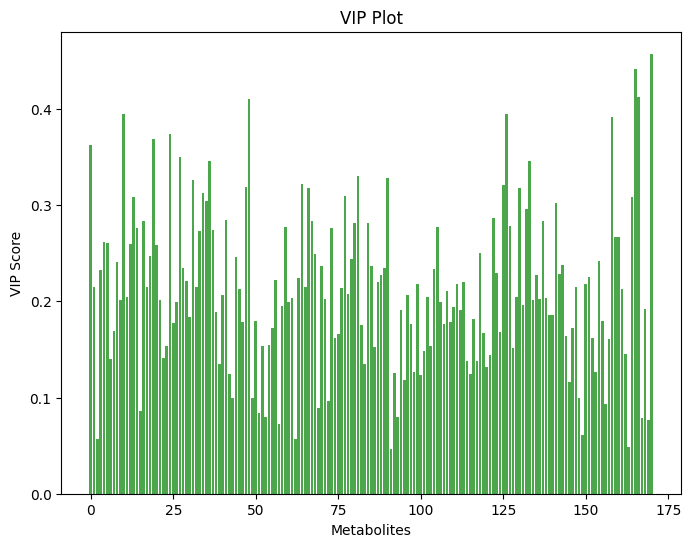

In [48]:
# Plot VIP
plt.figure(figsize=(8, 6))
plt.bar(range(X_train.shape[1]), vip, color='green', alpha=0.7)
plt.xlabel('Metabolites')
plt.ylabel('VIP Score')
plt.title('VIP Plot')
plt.show()

In [49]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
report = classification_report(y_test, y_pred_binary)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest - Finding important features

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
# Assuming X contains your features and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Initialize Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

In [53]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [54]:
# Get feature importances
feature_importances = rf_model.feature_importances_

In [55]:
# Get feature names
feature_names = X.columns

In [56]:
features = df.columns[2:]  # Assuming the first two columns are 'Sample' and 'Pheno'

In [57]:
features

Index(['xylulose ', 'xylose', 'xylonolactone ', 'xylitol', 'xanthosine',
       'xanthine', 'vanillic acid', 'valine', 'uridine', 'uric acid',
       ...
       '2-hydroxyglutaric acid', '2'-deoxyguanosine', '2,5-dihydroxypyrazine ',
       '2,3-bisphosphoglyceric acid', '1-monostearin', '1-monopalmitin',
       '1-methylinosine ', '1-hexadecanol', '1,5-anhydroglucitol',
       'Pheno_binary'],
      dtype='object', length=171)

In [58]:


# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

In [59]:
# Filter features with importance greater than 0.001
filtered_feature_importance_df = feature_importance_df[feature_importance_df['Importance'] > 0.02]

# Sort the filtered features by importance in descending order
sorted_feature_importance_df = filtered_feature_importance_df.sort_values(by='Importance', ascending = True)

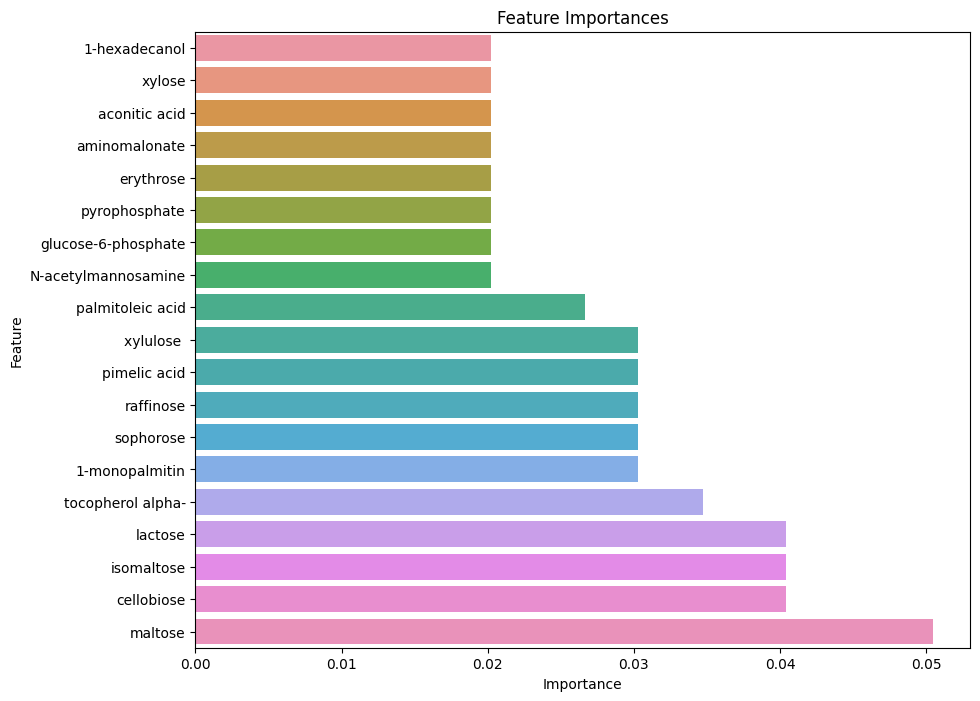

In [60]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=sorted_feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [61]:
feature_importance_df

,Feature,Importance
0,xylulose,0.030303
1,xylose,0.020202
2,xylonolactone,0.010101
3,xylitol,0.010101
4,xanthosine,0.010101
...,...,...
166,1-monopalmitin,0.030303
167,1-methylinosine,0.000000
168,1-hexadecanol,0.020202
169,"1,5-anhydroglucitol",0.010101


# Dendrogram and Heatmap

In [62]:
# Sort features based on importance
sorted_features = feature_importance_df.sort_values(by='Importance', ascending=False)['Feature']

# Extract relevant columns from the original dataframe
data_subset = df[sorted_features]

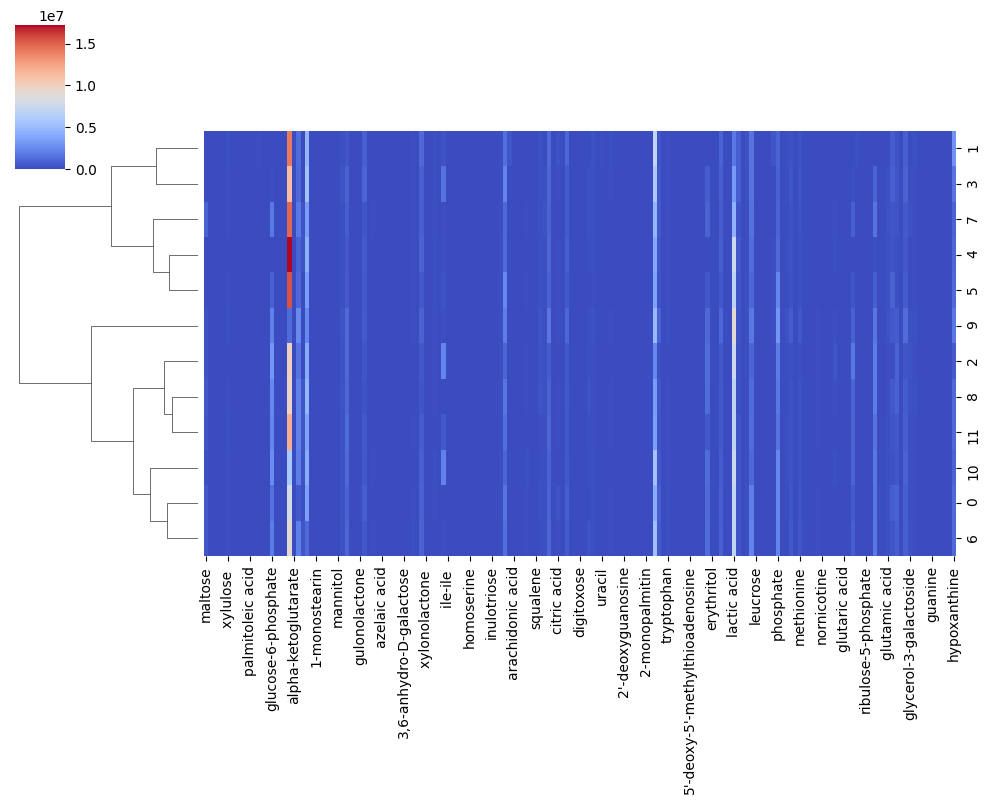

In [63]:
# Perform hierarchical clustering only on the selected features
Z_subset = linkage(data_subset, method='ward')

# Plot the dendrogram and heatmap
sns.clustermap(data_subset, row_linkage=Z_subset, col_cluster=False, cmap='coolwarm', figsize=(10, 8))

plt.show()